In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [143]:
df_car = pd.read_csv('CarPrice_Assignment.csv')
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [144]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [145]:
df_car.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [146]:
df_car.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [147]:
df_car[['CarBrand', 'CarModel']] = df_car['CarName'].str.split(' ', n=1, expand=True)
df_car.drop(columns=['CarName'], inplace=True)


0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarBrand, Length: 205, dtype: object

In [149]:
df_car['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [151]:
df_car['CarBrand']=df_car['CarBrand'].replace({
    'maxda':'mazda',
    'porcshce':'porsche',
    'toyouta':'toyota',
    'vokswagen':'volkswagen',
    'vw':'volkswagen'
})

Text(0, 0.5, 'Count of Cars')

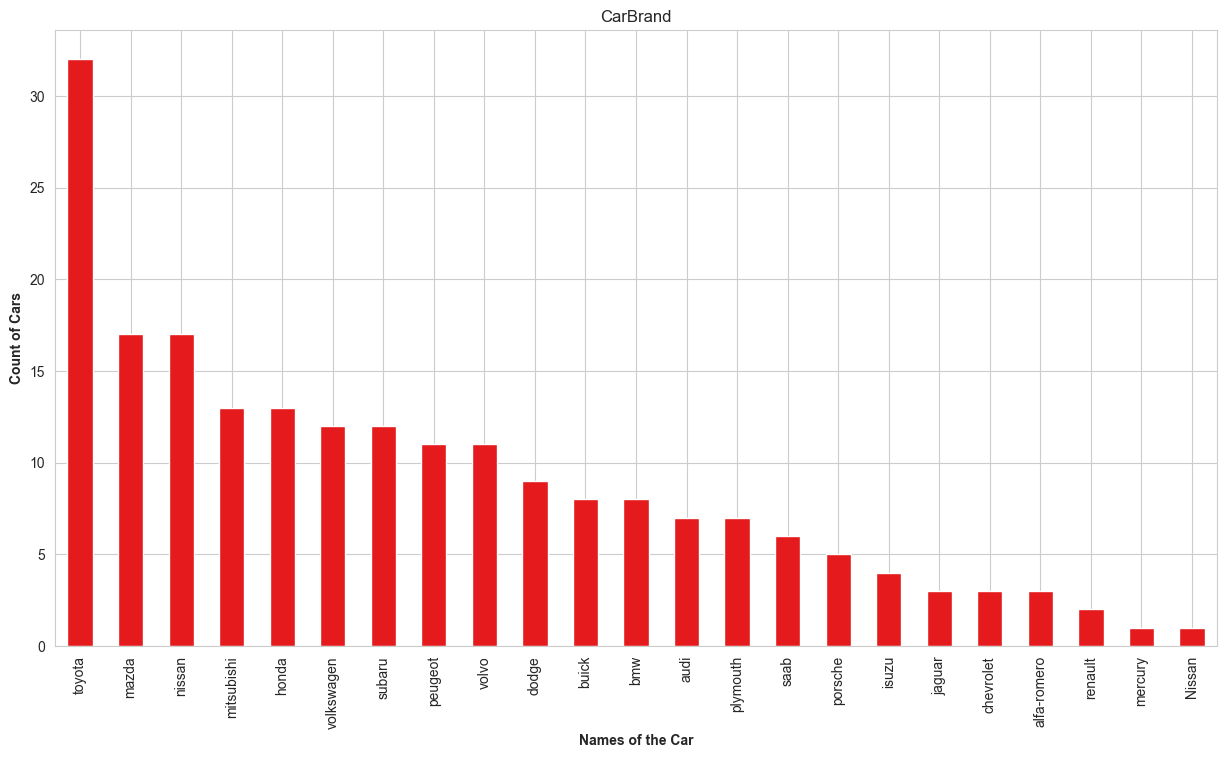

In [152]:
plt.rcParams['figure.figsize'] = [15,8]
ax=df_car['CarBrand'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarBrand')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

In [153]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_car['CarBrand'] = le.fit_transform(df_car['CarBrand'])
df_car['fueltype'] = le.fit_transform(df_car['fueltype'])
df_car['aspiration'] = le.fit_transform(df_car['aspiration'])
df_car['doornumber'] = le.fit_transform(df_car['doornumber'])
df_car['carbody'] = le.fit_transform(df_car['carbody'])
df_car['drivewheel'] = le.fit_transform(df_car['drivewheel'])
df_car['enginelocation'] = le.fit_transform(df_car['enginelocation'])
df_car['enginetype'] = le.fit_transform(df_car['enginetype'])
df_car['cylindernumber'] = le.fit_transform(df_car['cylindernumber'])
df_car['fuelsystem'] = le.fit_transform(df_car['fuelsystem'])
df_car.head()


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand,CarModel
0,1,3,1,0,1,0,2,0,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,1,giulia
1,2,3,1,0,1,0,2,0,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,1,stelvio
2,3,1,1,0,1,2,2,0,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,1,Quadrifoglio
3,4,2,1,0,0,3,1,0,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,2,100 ls
4,5,2,1,0,0,3,0,0,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,2,100ls


C:\Users\ziadw\AppData\Local\Temp\ipykernel_17020\1076052716.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_car.corr()


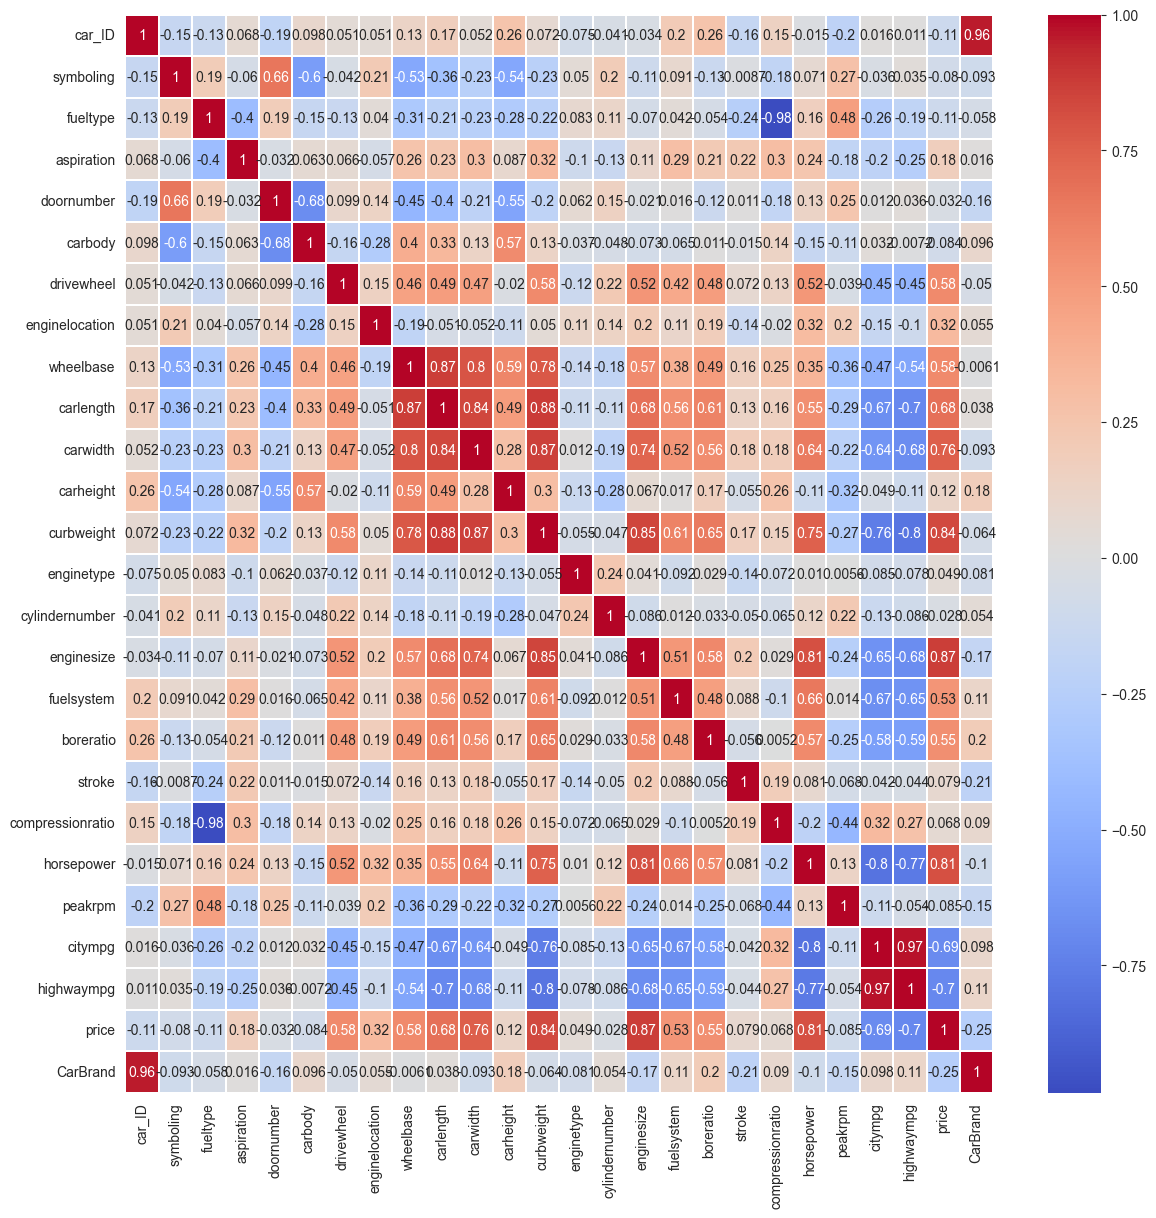

In [154]:
corr = df_car.corr()
plt.figure(figsize=(14,14)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.1)
plt.show()

In [155]:
x=df_car[['CarBrand','drivewheel', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg']]
y=df_car['price']


In [156]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [157]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [158]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [159]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.8773833271137553

In [160]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=0.01)
rr.fit(x_train,y_train)
y_pred=rr.predict(x_test)


In [161]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.877400732969497

In [162]:
lr.fit(x,y)
lr.coef_

array([-178.17650357, 1363.09979825,   15.29450942,  499.05973044,
          2.59278802,   70.21167135,   53.03579702,  -24.16697983,
         83.90417459])

In [163]:
# saving the model
import pickle
pickle.dump(lr,open('carPrice.pkl','wb'))

In [165]:
# loading the model
model=pickle.load(open('carPrice.pkl','rb'))
print(model.predict([[0,2,141.1,60.3,1488,61,48,26,32]]))


[2946.63514058]


c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


c:\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2000x1200 with 0 Axes>

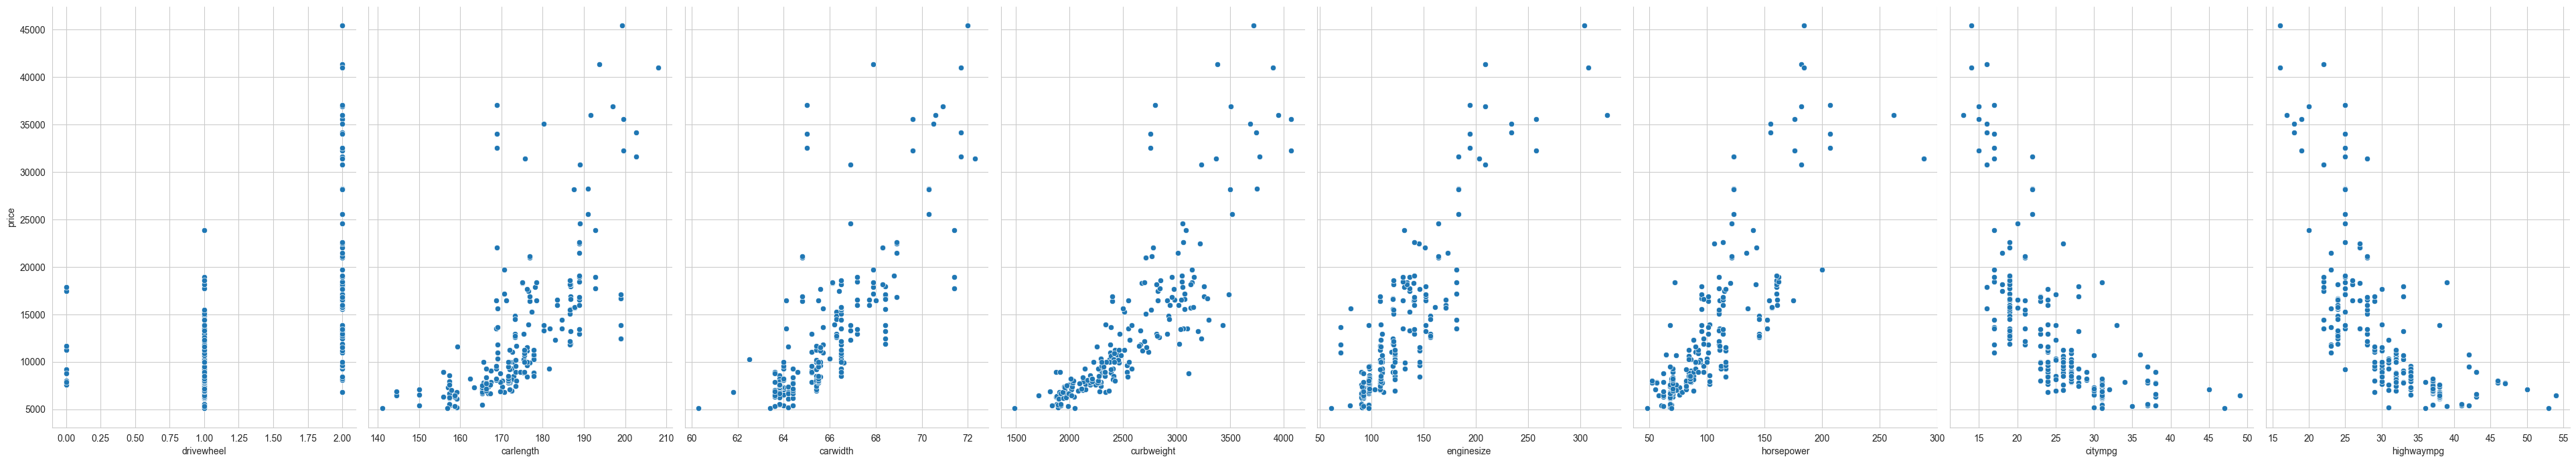

In [166]:
plt.figure(figsize=(20, 12))
sns.pairplot(df_car, x_vars=['drivewheel', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg'], y_vars='price', size=7, aspect=0.7, kind='scatter')
plt.show()


c:\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2000x1200 with 0 Axes>

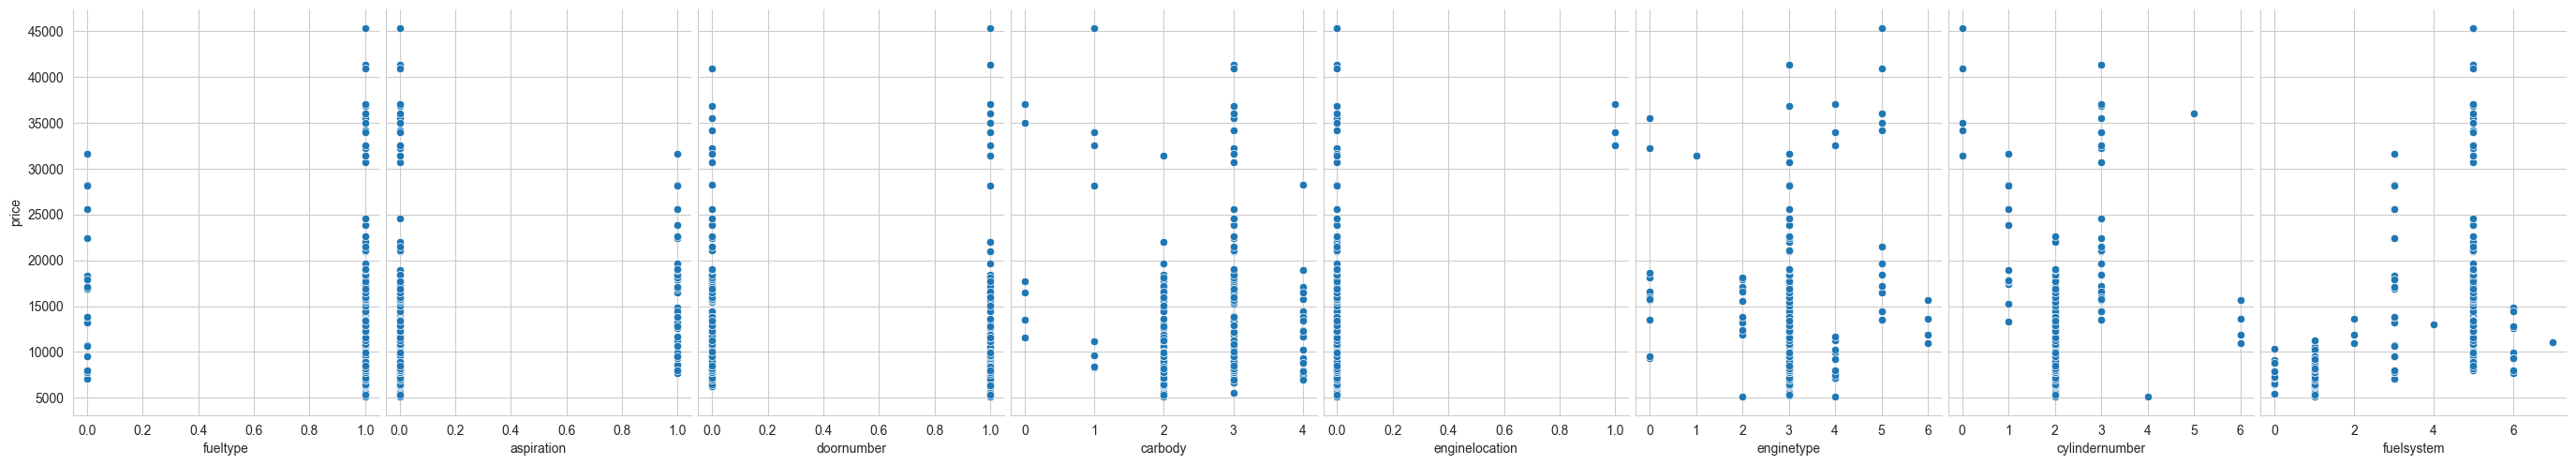

In [167]:
plt.figure(figsize=(20, 12))
sns.pairplot(df_car, x_vars=['fueltype', 'aspiration', 'doornumber', 'carbody', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], y_vars='price', size=5, aspect=0.7, kind='scatter')